<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

![](https://www.researchgate.net/profile/Alexander-Amini/publication/325142728/figure/fig1/AS:766109435326465@1559666131320/Non-convex-optimization-We-utilize-stochastic-gradient-descent-to-find-a-local-optimum.jpg)

# Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from pprint import pprint

# Data

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, bias=3, noise=8, random_state=788) 
X = np.squeeze(X)


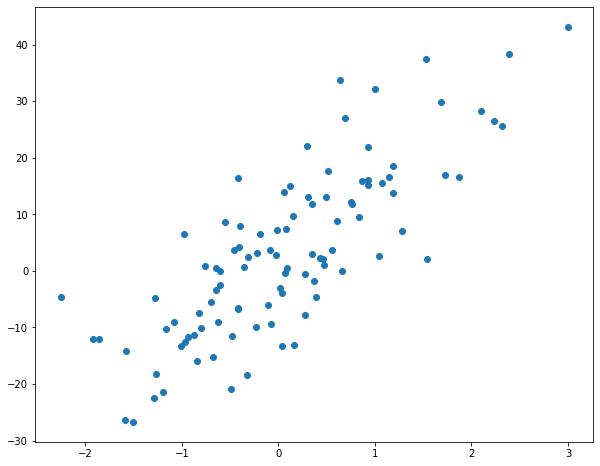

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)

# Linear Regression

![](https://miro.medium.com/max/1400/1*GSAcN9G7stUJQbuOhu0HEg.png)

In [ ]:
m = np.random.uniform(-3, 3)
b = np.random.uniform(-20, 20)
print(f'y = {m:.3f} X + {b:.3f}')

y = 0.662 X + -0.519


In [ ]:
def abline(slope, intercept, shape='--', color='red'):
    ax = plt.gca()
    _x = np.array(ax.get_xlim())
    _y = intercept + slope * _x
    plt.plot(_x, _y, shape, color='red')
    plt.title(f'y = {slope:.3f} X + {intercept:.3f}')

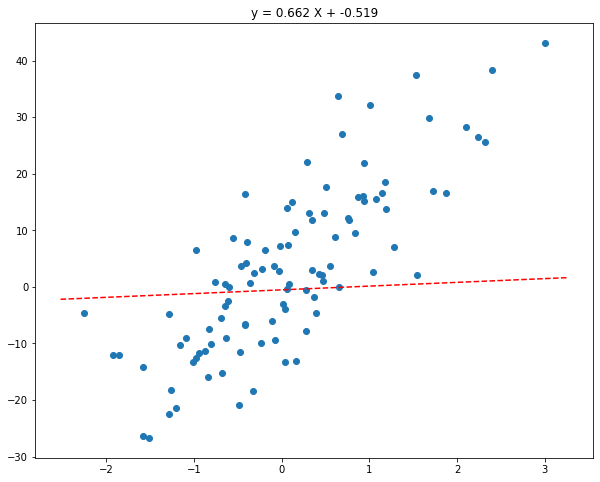

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
abline(m, b)

## Initialize

In [ ]:
def initialize_weights():
    m = np.random.uniform(-3, 3)
    b = np.random.uniform(-20, 20)
    print(f'y = {m:.3f} X + {b:.3f}')
    return m, b

## Prediction

In [ ]:
def linear_predict(X, slope, intercept):
    pred = X * slope + intercept
    return pred

## Loss
* Compute the overall loss function
* Sum of the mean squared differences

In [ ]:
def linear_loss(predicted, actual):
    n = predicted.shape[0]
    mse = np.sum((predicted - actual) ** 2) / n
    return mse

## Derivative
* What is the derivative of the slope with respect to the loss?
* What is the derivative of the intercept with respect to the loss?

In [ ]:
def derivative_slope(X, predicted, actual):
    deriv = -2 * np.sum(X * (actual - predicted))
    return deriv

In [ ]:
def derivative_intercept(X, predicted, actual):
    deriv = -2 * np.sum(actual - predicted)
    return deriv

## Update

In [ ]:
def linear_update(slope, intercept, derivative_slope, derivative_intercept, lr=0.001):
    slope     = slope     - lr * derivative_slope
    intercept = intercept - lr * derivative_intercept
    return slope, intercept

## Initial

y = -2.916 X + -9.135


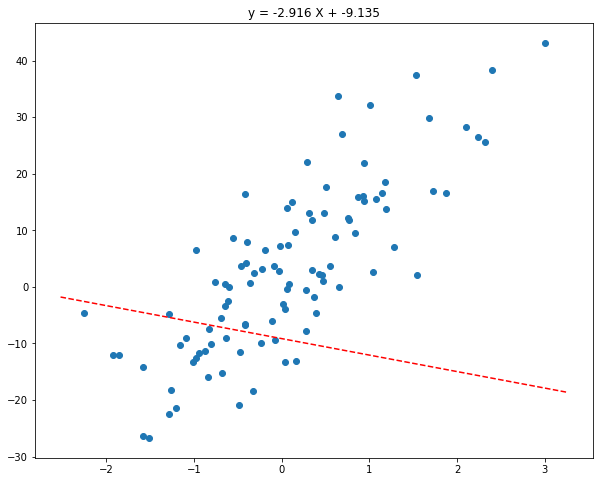

In [ ]:
slope, intercept = initialize_weights()
plt.figure(figsize=(10,8))
plt.scatter(X, y)
abline(slope, intercept)

## Training Loop

In [ ]:
epochs = 100
losses = []

for e in range(epochs):
    pred = linear_predict(X, slope, intercept)
    loss = linear_loss(pred, y) 
    losses.append(loss)
    d_slope     = derivative_slope(X, pred, y)
    d_intercept = derivative_intercept(X, pred, y) 
    slope, intercept = linear_update(slope, intercept, d_slope, d_intercept)


## Ending

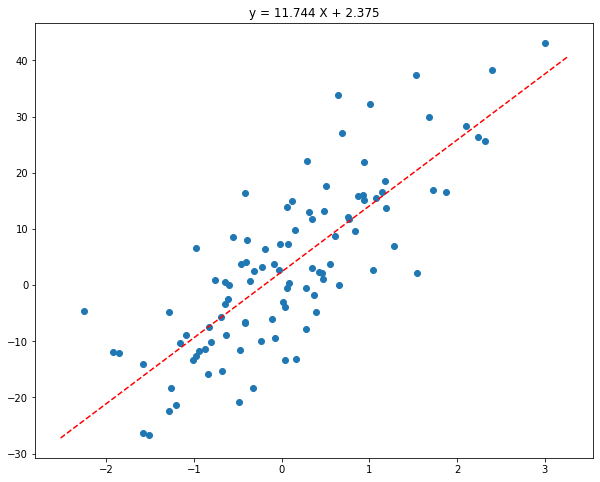

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
abline(slope, intercept)


## Losses by Epoch

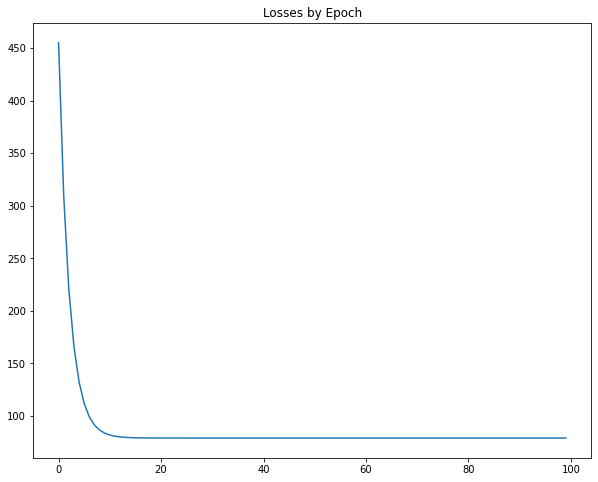

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(losses)
plt.title('Losses by Epoch');

## Verify
* Run sklearn LinearRegression & check coefficients & intercept

In [ ]:
lm = LinearRegression()
X_train = X.reshape(-1, 1)
lm.fit(X_train, y)
print(f'y = {lm.coef_[0]:.3f} X + {lm.intercept_:.3f}')

y = 11.744 X + 2.375


* Run statsmodels & check coefficients & intercept
* Note:  We have to add an intercept which we init to 1

In [ ]:
intercept = [1] * len(X)
X_train = np.vstack([X, intercept]).T
lm = sm.OLS(y, X_train)
fitted = lm.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.66e-23
Time:                        12:43:30   Log-Likelihood:                -360.41
No. Observations:                 100   AIC:                             724.8
Df Residuals:                      98   BIC:                             730.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.7441      0.889     13.217      0.0

## Perceptron

![](https://static.javatpoint.com/tutorial/pytorch/images/pytorch-perceptron2.jpg)

# Logistic Regression
* Logistic Regression is a statisical model
* It uses the logistic function to model the dependent variable
* It forms the basis of many neurons used to classify

In [ ]:
X_logistic, y_logistic = make_classification(n_classes=2, 
                                             n_clusters_per_class=1, 
                                             random_state=12,
                                             n_features=2, 
                                             n_informative=1, 
                                             n_redundant=0)
y_logistic.shape

(100,)

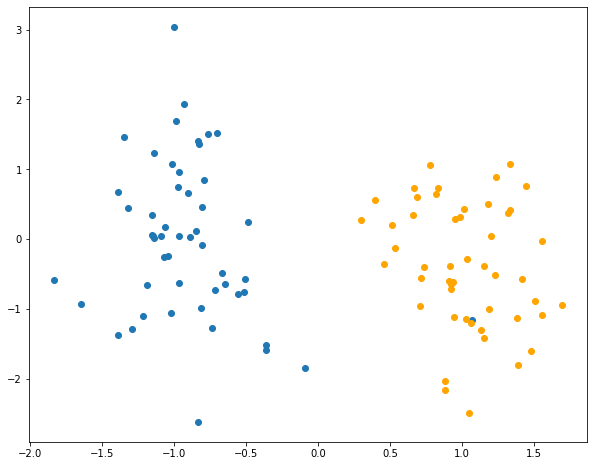

In [ ]:
plt.figure(figsize=(10,8))
for idx, color in enumerate(['#1f77b4', 'orange']):
    plt.scatter(X_logistic[y_logistic==idx][:,0], X_logistic[y_logistic==idx][:,1], color=color)

## Sigmoid
* Sigmoid is a bounded, differentiable function
* It approaches 1 as X gets large and 0 as X gets small
* At 0 the value is 0.5
* With respect to neural network activations, we can saturate
  * Saturation occurs when X is very large or small
  * At those points, the derivative is very small
  * Learning can be slow with a saturated neuron

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

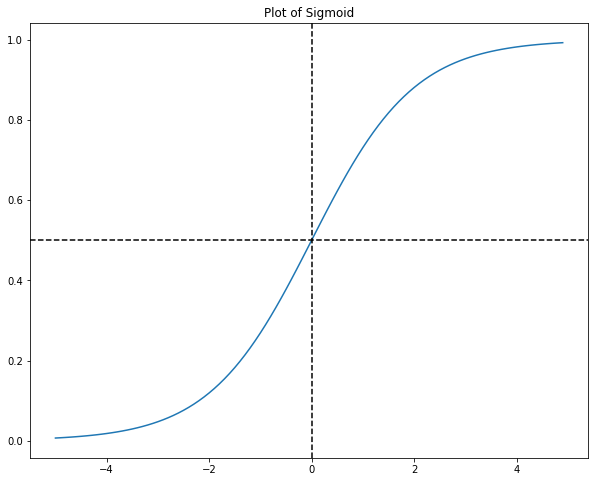

In [ ]:
plot_x = np.arange(-5,5,0.1)
plot_y = sigmoid(plot_x)
plt.figure(figsize=(10,8))
plt.plot(plot_x, plot_y)
ax = plt.gca()
ax.axvline(x=0.0, ls='--', color='black')
ax.axhline(y=0.5, ls='--', color='black')
plt.title('Plot of Sigmoid');

## Initialize
* Randomly initialize weights
* We'll have two parameters

In [ ]:
def initialize_parameters(n_params=2):
    return np.random.uniform(-5, 5, n_params)

## Prediction
* We take the sigmoid of the dot / inner product of our data X and two parameters
* We round this to 0 or 1 to determine the class

In [ ]:
def predict_logistic(X, parameters):
    return sigmoid(np.dot(X, parameters))

def predict_classes(X, parameters):
    return np.round(sigmoid(np.dot(X, parameters)))

## Loss
* We're using cross-entropy loss for our logistic function
  * loss = -log(sigmoid(X, W)) if y == 1
  * loss = -log(1 - sigmoid(X, W)) if y == 0
* Because log(0) is undefined, we're adding a small jitter
* Shapes:
  * y matrix is (100, 1)
  * predictions matrix is (100, 1)
  * We need to transpose the y matric to have our dot product correct
  * (1, 100) @ (100, 1)
  * This returns 1 value, the overall loss

In [ ]:
def logistic_loss(pred, y):
    eps = 1e-06
    cost = (-y).T @ np.log(pred + eps) - (1 - y).T @ np.log(1 - pred + eps)
    return cost

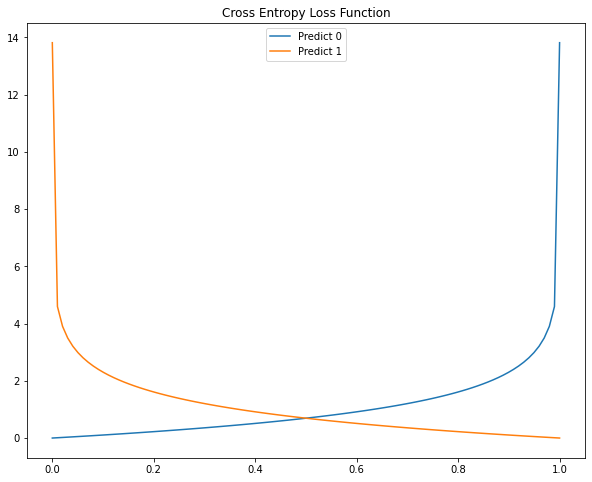

In [ ]:
plt.figure(figsize=(10,8))
plot_x = np.linspace(0,1,100)
loss0 = -np.log(1 - plot_x + 1.e-06)
loss1 = -np.log(plot_x + 1.e-06)
plt.plot(plot_x, loss0, label='Predict 0')
plt.plot(plot_x, loss1, label='Predict 1')
plt.title('Cross Entropy Loss Function')
plt.legend();

## Derivatives

In [ ]:
def derivative_logistic(params, X, y):
    m = X.shape[0]
    d_params = (1 / m) * np.dot(X.T, (sigmoid(X @ params) - y))
    return d_params

## Update

In [ ]:
def update_parameters(params, dParams, lr=0.01):
    params = params - lr * dParams
    return params

## Training Loop

In [ ]:
epochs = 5000
losses = []
params = initialize_parameters()
original_params = params.copy()

y_hat_original = predict_classes(X_logistic, params)

for e in range(epochs):
    preds = predict_logistic(X_logistic, params)
    loss  = logistic_loss(preds, y_logistic)
    losses.append(loss)
    dParams = derivative_logistic(params, X_logistic, y_logistic)
    params  = update_parameters(params, dParams)

y_hat_complete = predict_classes(X_logistic, params)


## Beginning Errors
* Red = Failure
* Green = Correct

              precision    recall  f1-score   support

         0.0       0.37      0.46      0.41        41
         1.0       0.55      0.46      0.50        59

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.48      0.46      0.46       100



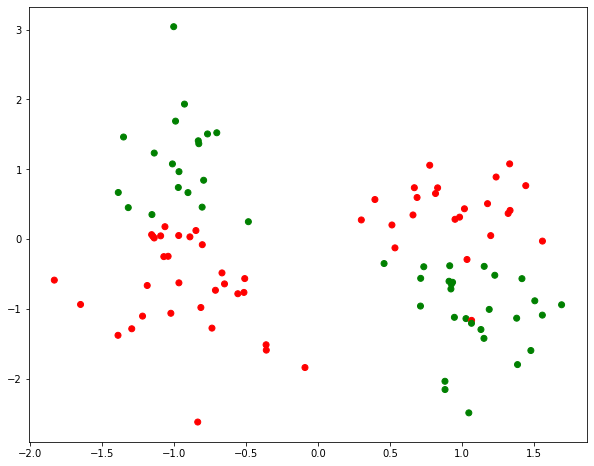

In [ ]:
plt.figure(figsize=(10,8))
correct = y_hat_original == y_logistic
color = np.where(correct == True, 'green', 'red')
plt.scatter(X_logistic[:,0], X_logistic[:,1], color=color)
print(classification_report(y_hat_original, y_logistic))

## Ending Errors
* After training we only have one mis-classified example

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



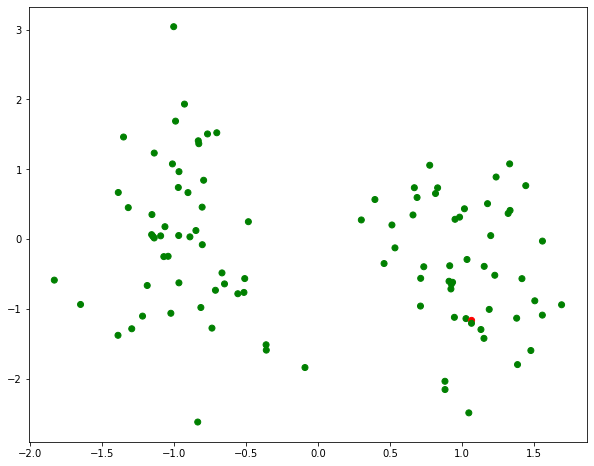

In [ ]:
plt.figure(figsize=(10,8))
correct = y_hat_complete == y_logistic
color = np.where(correct == True, 'green', 'red')
plt.scatter(X_logistic[:,0], X_logistic[:,1], color=color)
print(classification_report(y_hat_complete, y_logistic))


## Losses by Epoch

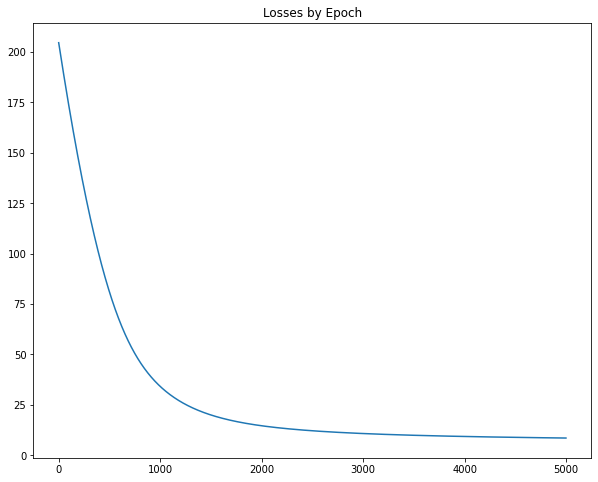

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(losses)
plt.title('Losses by Epoch');

## Logistic Formula

![](https://www.dotnetlovers.com/Images/LogisticRegressionFormula1020201890212AM.png)

## Perceptron 

![](https://static.javatpoint.com/tutorial/pytorch/images/pytorch-perceptron2.jpg)

# Questions & Future Talks
* How do we go from a perceptron to deep learning?
* Mechanics of gradient descent - How do we find the best weights?
  * Weight initialization
  * Activation functions
  * Loss functions
  * Optimizers
  * Learning rate
  * Regularizing
* What are deep learning models learning?
* What are effective model architectures for specific tasks?
